In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
app = pd.read_csv("E:\\Analytix labs\\Interenship\\BFSI -Risk Analysis - P7\\application_data.csv")
prev = pd.read_csv("E:\\Analytix labs\\Interenship\\BFSI -Risk Analysis - P7\\previous_application.csv")

### Application Data

In [3]:
app.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app.shape

(307511, 122)

In [5]:
ab = app.isnull().sum()*100/app.shape[0]  #Finding out null values
ab = ab[ab<=40]
ab = pd.DataFrame(ab)
ab.index 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [6]:
app1 = app.loc[:,['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

In [7]:
app1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Previous Application

In [8]:
prev.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
prev.shape

(1670214, 37)

In [10]:
ab = prev.isnull().sum()*100/prev.shape[0]  #Finding out null values
ab = ab[ab<=40]
ab = pd.DataFrame(ab)
ab.index 

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [11]:
pre1 = prev.loc[:,['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']]

In [12]:
pre1.shape

(1670214, 26)

In [13]:
pre1.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


### EDA (Exploratory Data Analysis)

### Univariate

### Application DATA

####  Organization Type Distribution (Top 10)

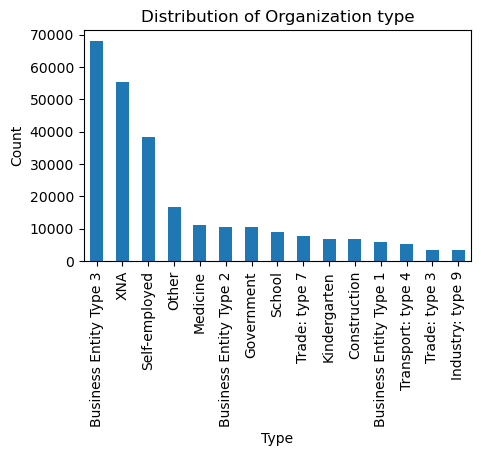

In [14]:
plt.figure(figsize = (5,3))
app1['ORGANIZATION_TYPE'].value_counts().head(15).plot(kind='bar')
plt.title('Distribution of Organization type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

#### Applicant Family Size(Top 5)

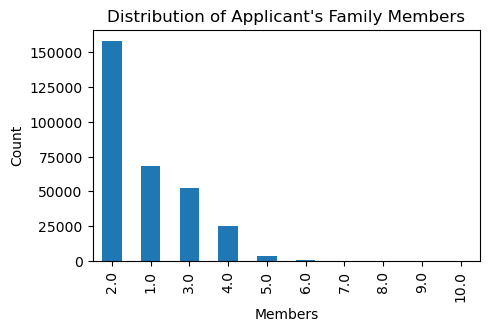

In [15]:
plt.figure(figsize = (5,3))
app1['CNT_FAM_MEMBERS'].value_counts().head(10).plot(kind='bar')
plt.title("Distribution of Applicant's Family Members")
plt.xlabel('Members')
plt.ylabel('Count')
plt.show()

###  Occupation type Distribution(Top 10)

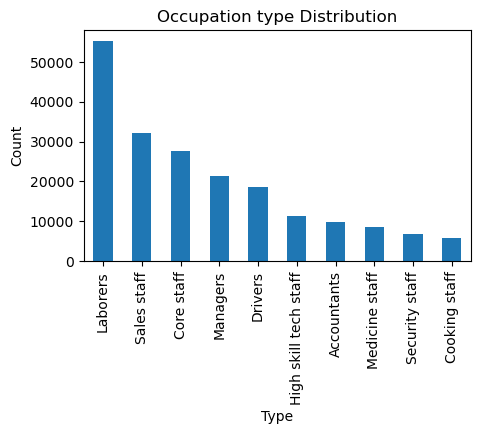

In [16]:
plt.figure(figsize = (5,3))
app1['OCCUPATION_TYPE'].value_counts().head(10).plot(kind='bar')
plt.title('Occupation type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

#### Mobile No Reachability 

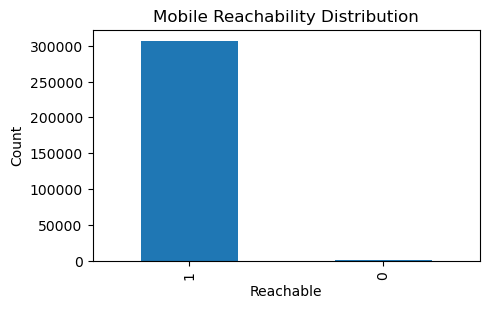

In [17]:
plt.figure(figsize = (5,3))
app1['FLAG_CONT_MOBILE'].value_counts().plot(kind='bar')
plt.title('Mobile Reachability Distribution')
plt.xlabel('Reachable')
plt.ylabel('Count')
plt.show()

#### Email Ownership

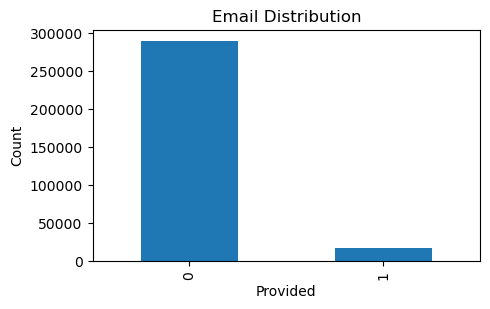

In [18]:
plt.figure(figsize = (5,3))
app1['FLAG_EMAIL'].value_counts().plot(kind='bar')
plt.title('Email Distribution')
plt.xlabel('Provided')
plt.ylabel('Count')
plt.show()

#### Region Rating Distribution

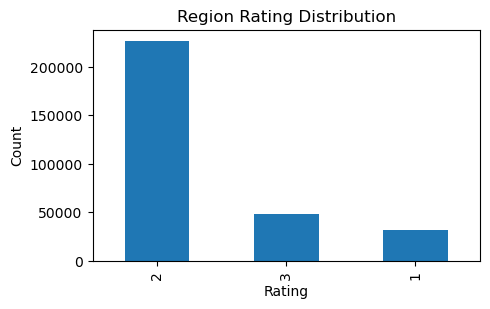

In [19]:
plt.figure(figsize = (5,3))
app1['REGION_RATING_CLIENT'].value_counts().plot(kind='bar')
plt.title('Region Rating Distribution') 
plt.xlabel('Rating') 
plt.ylabel('Count') 
plt.show()

### Weekday Application Trends

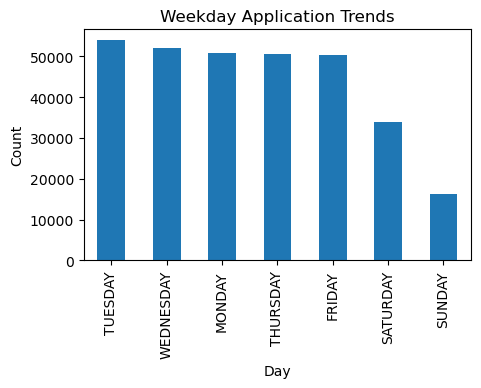

In [20]:
plt.figure(figsize = (5,3))
app1['WEEKDAY_APPR_PROCESS_START'].value_counts().plot(kind='bar')
plt.title('Weekday Application Trends')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

### Previous Application

#### Previous Loan Purpose Distribution

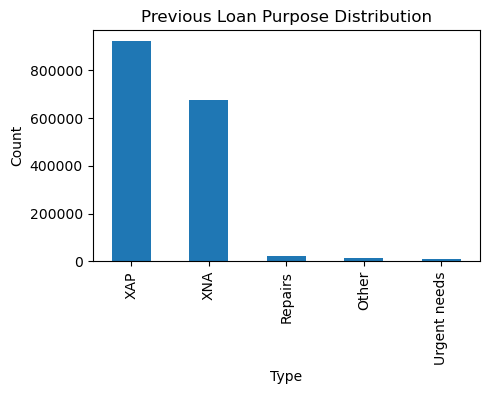

In [21]:
plt.figure(figsize = (5,3))
pre1['NAME_CASH_LOAN_PURPOSE'].value_counts().head(5).plot(kind='bar') 
plt.title('Previous Loan Purpose Distribution') 
plt.xlabel('Type') 
plt.ylabel('Count') 
plt.show()

#### Previous Loan Type Distribution

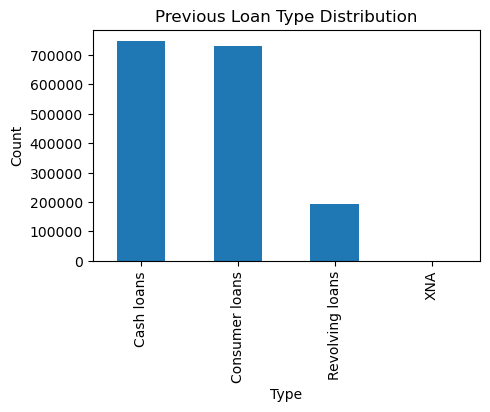

In [22]:
plt.figure(figsize = (5,3))
pre1['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar') 
plt.title('Previous Loan Type Distribution') 
plt.xlabel('Type') 
plt.ylabel('Count') 
plt.show()

#### Previous Payment Channel Distribution

In [23]:
pre1['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

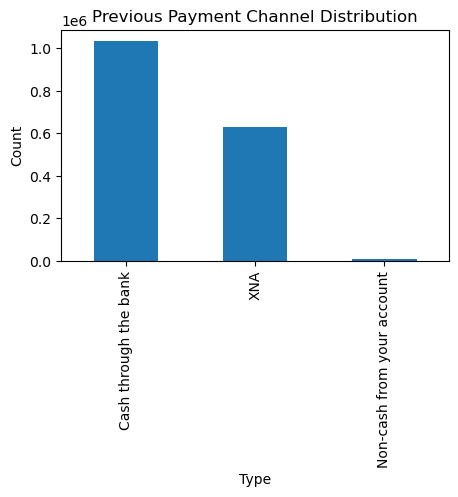

In [24]:
plt.figure(figsize = (5,3))
pre1['NAME_PAYMENT_TYPE'].value_counts().head(3).plot(kind='bar') 
plt.title('Previous Payment Channel Distribution') 
plt.xlabel('Type') 
plt.ylabel('Count') 
plt.show()

#### Previous Loan Rejection Reason Distribution

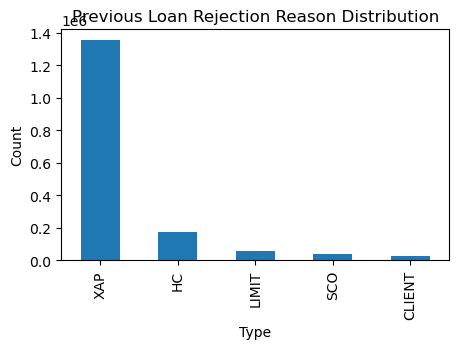

In [25]:
plt.figure(figsize = (5,3))
pre1['CODE_REJECT_REASON'].value_counts().head(5).plot(kind='bar') 
plt.title('Previous Loan Rejection Reason Distribution') 
plt.xlabel('Type') 
plt.ylabel('Count') 
plt.show()

#### Distribution of Client Status New vs Repeat

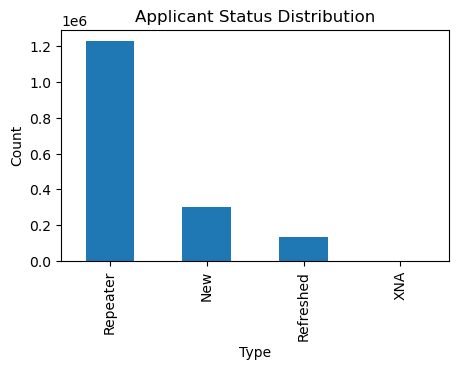

In [26]:
plt.figure(figsize = (5,3))
pre1['NAME_CLIENT_TYPE'].value_counts().plot(kind='bar') 
plt.title('Applicant Status Distribution') 
plt.xlabel('Type') 
plt.ylabel('Count') 
plt.show()

#### Previous Product Type Distribution

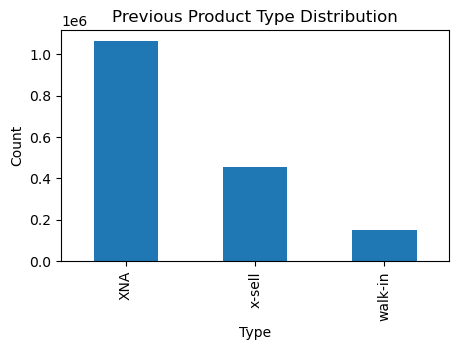

In [27]:
plt.figure(figsize = (5,3))
pre1['NAME_PRODUCT_TYPE'].value_counts().plot(kind='bar') 
plt.title('Previous Product Type Distribution') 
plt.xlabel('Type') 
plt.ylabel('Count') 
plt.show()

#### Previous Loans Channel Type for Client Acquisition

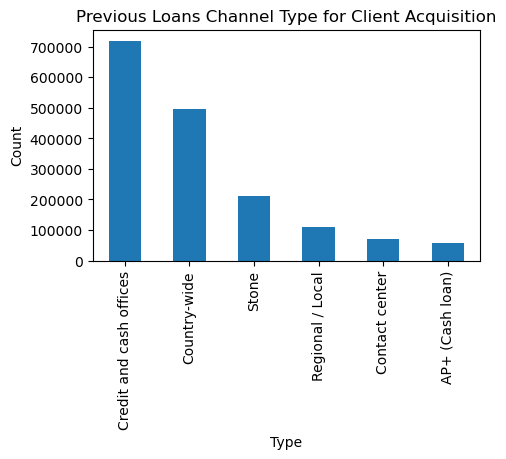

In [28]:
plt.figure(figsize = (5,3))
pre1['CHANNEL_TYPE'].value_counts().head(6).plot(kind='bar') 
plt.title('Previous Loans Channel Type for Client Acquisition') 
plt.xlabel('Type') 
plt.ylabel('Count') 
plt.show()

#### Previous Loan Seller Industry Type Distribution

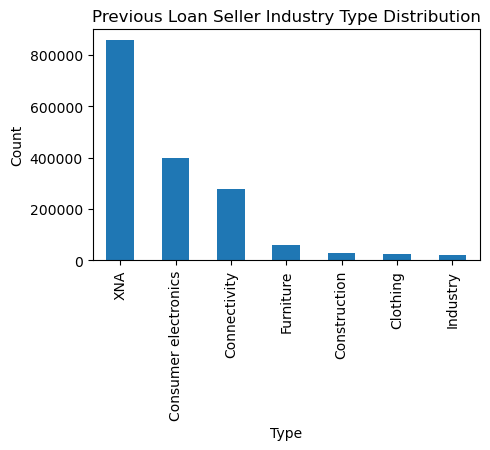

In [29]:
plt.figure(figsize = (5,3))
pre1['NAME_SELLER_INDUSTRY'].value_counts().head(7).plot(kind='bar') 
plt.title('Previous Loan Seller Industry Type Distribution') 
plt.xlabel('Type') 
plt.ylabel('Count') 
plt.show()

### Bivariate

#### Mobile No Reachability vs Loan Default

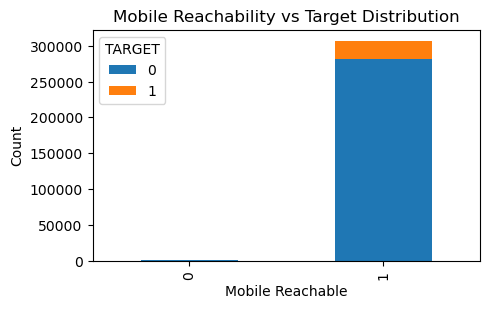

In [30]:
ad = app1.groupby('FLAG_CONT_MOBILE')['TARGET'].value_counts().unstack().reset_index()
ad.set_index('FLAG_CONT_MOBILE').plot(kind='bar', stacked=True, figsize=(5,3))
plt.title('Mobile Reachability vs Target Distribution')
plt.xlabel('Mobile Reachable')
plt.ylabel('Count')
plt.show()

#### Email Ownership vs Loan Default

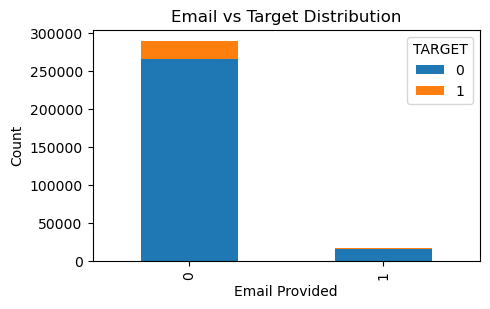

In [31]:
email_target = app1.groupby('FLAG_EMAIL')['TARGET'].value_counts().unstack(fill_value=0)

email_target.plot(kind='bar', stacked=True, figsize=(5,3))

plt.title('Email vs Target Distribution')
plt.xlabel('Email Provided')
plt.ylabel('Count')
plt.show()


#### No of Family Member vs Loan Default

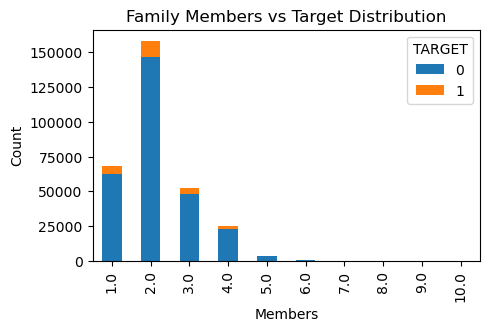

In [32]:
fmlycnt_target = app1.groupby('CNT_FAM_MEMBERS')['TARGET'].value_counts().head(18).unstack(fill_value=0)

fmlycnt_target.plot(kind='bar', stacked=True, figsize=(5,3))

plt.title('Family Members vs Target Distribution')
plt.xlabel('Members')
plt.ylabel('Count')
plt.show()

####  Applicant Region Rating  vs Loan Default

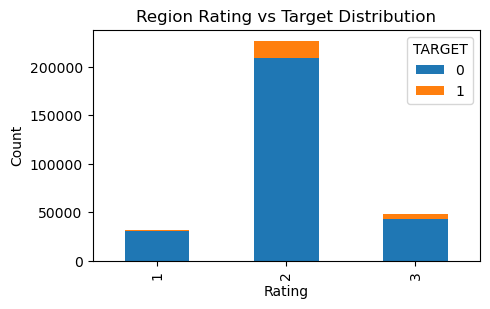

In [33]:
rr = app1.groupby('REGION_RATING_CLIENT')['TARGET'].value_counts().head(18).unstack(fill_value=0)

rr.plot(kind='bar', stacked=True, figsize=(5,3))

plt.title('Region Rating vs Target Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

####  Applicant City Rating vs Loan Default

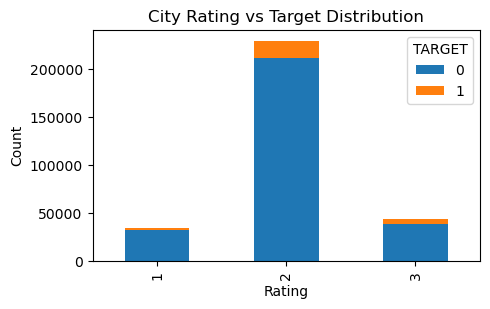

In [34]:
rc = app1.groupby('REGION_RATING_CLIENT_W_CITY')['TARGET'].value_counts().unstack(fill_value=0)

rc.plot(kind='bar', stacked=True, figsize=(5,3))

plt.title('City Rating vs Target Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### Applied Day vs Loan Default

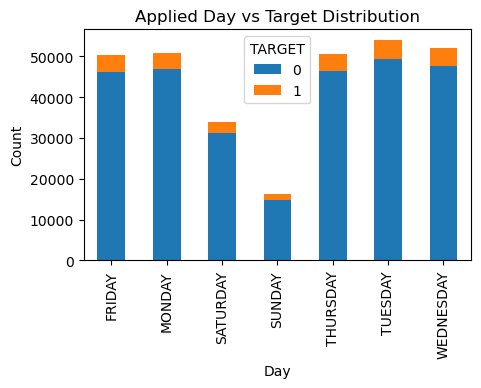

In [50]:
dl = app1.groupby('WEEKDAY_APPR_PROCESS_START')['TARGET'].value_counts().unstack(fill_value=0)

dl.plot(kind='bar', stacked=True, figsize=(5,3))

plt.title('Applied Day vs Target Distribution')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

#### Document_2 Providers vs Loan Default

In [36]:
app1.groupby('FLAG_DOCUMENT_2')['TARGET'].value_counts().reset_index(name = 'Count')

,FLAG_DOCUMENT_2,TARGET,Count
0,0,0,282677
1,0,1,24821
2,1,0,9
3,1,1,4


### Organization Type vs Loan Default

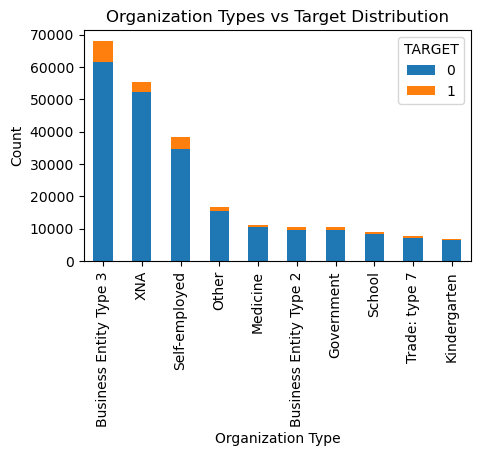

In [37]:
ol = app1.groupby('ORGANIZATION_TYPE')['TARGET'].value_counts().unstack(fill_value=0)
ol = ol.assign(total=ol.sum(axis=1)).sort_values(by='total', ascending=False).head(10)
ol = ol.drop(columns='total')

ol.plot(kind='bar', stacked=True, figsize=(5,3))
plt.title('Organization Types vs Target Distribution')
plt.xlabel('Organization Type')
plt.ylabel('Count')
plt.show()

### Multivariate

#### Gender vs Organization type vs loan default 

In [39]:
app1.groupby(['CODE_GENDER', 'ORGANIZATION_TYPE'])['TARGET'].value_counts().reset_index(name = 'Count')

,CODE_GENDER,ORGANIZATION_TYPE,TARGET,Count
0,F,Advertising,0,243
1,F,Advertising,1,19
2,F,Agriculture,0,1148
3,F,Agriculture,1,126
4,F,Bank,0,1940
...,...,...,...,...
228,M,XNA,1,741
229,XNA,Business Entity Type 1,0,1
230,XNA,Industry: type 3,0,1
231,XNA,Kindergarten,0,1


#### Education Type vs Income Total vs Loan Default

In [40]:
app1.groupby(['NAME_EDUCATION_TYPE', 'AMT_INCOME_TOTAL'])['TARGET'].value_counts().reset_index(name='Count')

,NAME_EDUCATION_TYPE,AMT_INCOME_TOTAL,TARGET,Count
0,Academic degree,49500.0,0,1
1,Academic degree,67500.0,0,3
2,Academic degree,76500.0,0,2
3,Academic degree,81000.0,0,1
4,Academic degree,90000.0,0,5
...,...,...,...,...
3990,Secondary / secondary special,2930026.5,0,1
3991,Secondary / secondary special,3600000.0,0,1
3992,Secondary / secondary special,4500000.0,0,1
3993,Secondary / secondary special,18000090.0,0,1


#### Number of Children vs Income Total vs Loan Default

In [41]:
app1.groupby(['CNT_CHILDREN', 'AMT_INCOME_TOTAL'])['TARGET'].count().reset_index(name = 'Count')

,CNT_CHILDREN,AMT_INCOME_TOTAL,Count
0,0,25650.0,2
1,0,26100.0,3
2,0,26460.0,1
3,0,26550.0,1
4,0,27000.0,47
...,...,...,...
3544,12,337500.0,1
3545,14,45000.0,1
3546,14,54000.0,1
3547,14,225000.0,1


#### Occupation Type, Region Rating vs Loan Default

In [42]:
app1.groupby(['OCCUPATION_TYPE', 'REGION_RATING_CLIENT'])['TARGET'].value_counts().reset_index(name = 'Count')

,OCCUPATION_TYPE,REGION_RATING_CLIENT,TARGET,Count
0,Accountants,1,0,1275
1,Accountants,1,1,41
2,Accountants,2,0,6726
3,Accountants,2,1,333
4,Accountants,3,0,1338
...,...,...,...,...
103,Waiters/barmen staff,1,1,14
104,Waiters/barmen staff,2,0,928
105,Waiters/barmen staff,2,1,107
106,Waiters/barmen staff,3,0,158


#### Mobile No. Reachability vs Email Ownership vs Loan Default

In [43]:
app1.groupby(['FLAG_CONT_MOBILE', 'FLAG_EMAIL'])['TARGET'].value_counts().reset_index(name = 'Count')

,FLAG_CONT_MOBILE,FLAG_EMAIL,TARGET,Count
0,0,0,0,484
1,0,0,1,41
2,0,1,0,45
3,0,1,1,4
4,1,0,0,266134
5,1,0,1,23410
6,1,1,0,16023
7,1,1,1,1370


#### Housing Type vs Car Ownership vs Loan Default

In [51]:
app1.groupby(['NAME_HOUSING_TYPE', 'FLAG_OWN_CAR'])['TARGET'].value_counts().reset_index(name = 'Count')

,NAME_HOUSING_TYPE,FLAG_OWN_CAR,TARGET,Count
0,Co-op apartment,N,0,609
1,Co-op apartment,N,1,52
2,Co-op apartment,Y,0,424
3,Co-op apartment,Y,1,37
4,House / apartment,N,0,164601
5,House / apartment,N,1,14673
6,House / apartment,Y,0,86995
7,House / apartment,Y,1,6599
8,Municipal apartment,N,0,7664
9,Municipal apartment,N,1,733


#### Gender vs Family Status vs Loan Default

In [62]:
app1.groupby(['CODE_GENDER', 'NAME_FAMILY_STATUS'])['TARGET'].value_counts().reset_index(name = 'Count')

,CODE_GENDER,NAME_FAMILY_STATUS,TARGET,Count
0,F,Civil marriage,0,19016
1,F,Civil marriage,1,1753
2,F,Married,0,114121
3,F,Married,1,8324
4,F,Separated,0,14416
5,F,Separated,1,1045
6,F,Single / not married,0,26364
7,F,Single / not married,1,2220
8,F,Unknown,0,1
9,F,Widow,0,14360


#### Education Type vs Occupation Type vs Loan Default

In [56]:
app1.groupby(['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE'])['TARGET'].value_counts().reset_index(name = 'Count')

,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,TARGET,Count
0,Academic degree,Accountants,0,7
1,Academic degree,Accountants,1,1
2,Academic degree,Cleaning staff,0,2
3,Academic degree,Cooking staff,0,1
4,Academic degree,Core staff,0,25
...,...,...,...,...
148,Secondary / secondary special,Secretaries,1,51
149,Secondary / secondary special,Security staff,0,5025
150,Secondary / secondary special,Security staff,1,618
151,Secondary / secondary special,Waiters/barmen staff,0,932
